<a href="https://colab.research.google.com/github/devt287/applied_stat/blob/main/HW3_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# generate z_1, ..., z_n ~ N(0.5, 1) with n = 200
mu = 0.5
sigma = 1
nsim = 200
set.seed(2024)
Z = rnorm(nsim, mu, sigma)

In [12]:
# YOUR CODE (~3 lines):
# partition Z into 49 evenly spaced bins [-4.9, -4.7], [-4.7, -4.5], ..., [4.7, 4.9];
# construct a data frame with X being the centers of the above bins,
# and Y being the histogram counts of Z in each bin
# Define bin edges
bin_edges = seq(-4.9, 4.9, by = 0.2)

# Compute histogram counts
hist_counts = hist(Z, breaks = bin_edges, plot = FALSE)$counts

# Compute bin centers
bin_centers = (bin_edges[-length(bin_edges)] + bin_edges[-1]) / 2

# Construct data frame
df = data.frame(X = bin_centers, Y = hist_counts)

# Print the data frame
print(df)


      X  Y
1  -4.8  0
2  -4.6  0
3  -4.4  0
4  -4.2  0
5  -4.0  0
6  -3.8  0
7  -3.6  0
8  -3.4  0
9  -3.2  0
10 -3.0  0
11 -2.8  1
12 -2.6  0
13 -2.4  1
14 -2.2  0
15 -2.0  0
16 -1.8  0
17 -1.6  4
18 -1.4  3
19 -1.2  4
20 -1.0  3
21 -0.8  9
22 -0.6 11
23 -0.4  4
24 -0.2 14
25  0.0 10
26  0.2 17
27  0.4 16
28  0.6 13
29  0.8 14
30  1.0 18
31  1.2 11
32  1.4 12
33  1.6 13
34  1.8  7
35  2.0  3
36  2.2  5
37  2.4  3
38  2.6  1
39  2.8  3
40  3.0  0
41  3.2  0
42  3.4  0
43  3.6  0
44  3.8  0
45  4.0  0
46  4.2  0
47  4.4  0
48  4.6  0
49  4.8  0


In [13]:
# YOUR CODE (~1 line):
# apply Lindsey's method to fit a Poisson GLM with a degree-5 polynomial of X
# note 1: remember to add the "offset" term (correp. to h(X_i) = exp(-X_i^2/2)) to the GLM
# note 2: remember to set "raw = TRUE" if you use the poly() function;
# otherwise you arrive at orthogonal polynomials

model_full = glm(Y ~ poly(X, 5, raw = TRUE) + offset(log(exp(-X^2/2))), family = poisson(link = "log"), data = df)

summary(model_full)


Call:
glm(formula = Y ~ poly(X, 5, raw = TRUE) + offset(log(exp(-X^2/2))), 
    family = poisson(link = "log"), data = df)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              2.552803   0.105176  24.272  < 2e-16 ***
poly(X, 5, raw = TRUE)1  0.535521   0.156651   3.419  0.00063 ***
poly(X, 5, raw = TRUE)2  0.106866   0.100005   1.069  0.28525    
poly(X, 5, raw = TRUE)3 -0.008562   0.070525  -0.121  0.90337    
poly(X, 5, raw = TRUE)4 -0.007268   0.013451  -0.540  0.58900    
poly(X, 5, raw = TRUE)5 -0.002270   0.005942  -0.382  0.70250    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 85.967  on 48  degrees of freedom
Residual deviance: 29.579  on 43  degrees of freedom
AIC: 132.52

Number of Fisher Scoring iterations: 7


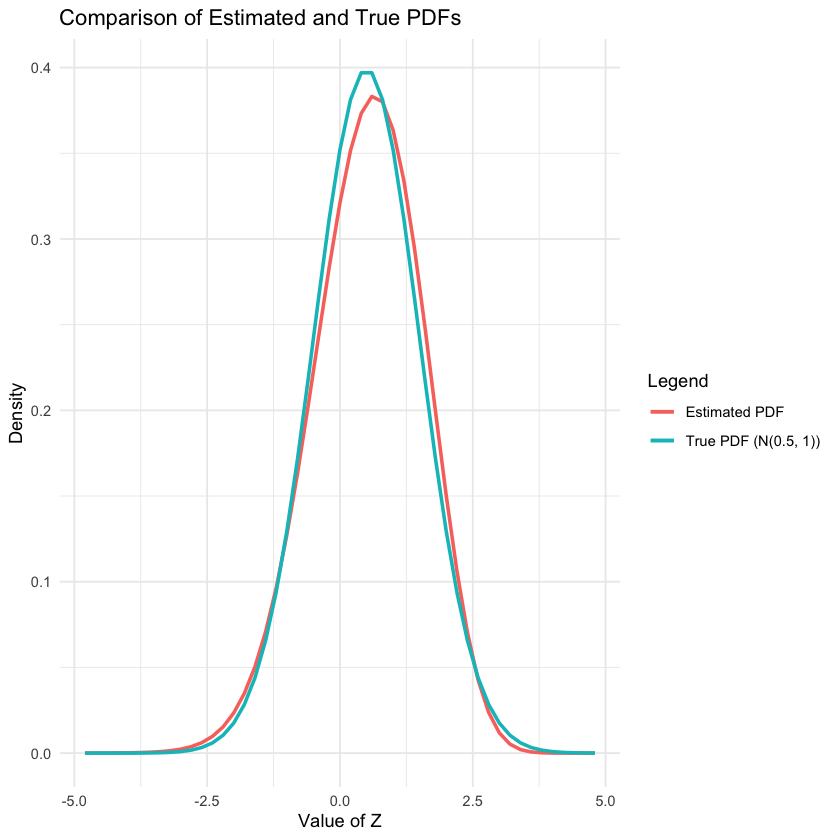

In [14]:
library("ggplot2")

# YOUR CODE (~8 lines): use ggplot, compute and plot
# 1. the estimated pdf of Z from the above Poisson GLM
# 2. the truth pdf of Z (i.e. N(0.5, 1))
# be sure to find the right normalization for the estimated pdf
# plot them in the same figure, with different colors
# Compute the estimated PDF from the Poisson GLM
predicted_counts = predict(model_full, type = "response")
pdf_est = predicted_counts / sum(predicted_counts) / (bin_centers[2] - bin_centers[1])

# Compute the true PDF of Z for each bin center
pdf_true = dnorm(df$X, mean = mu, sd = sigma)

# Plot using ggplot2
ggplot(df, aes(x = X)) +
  geom_line(aes(y = pdf_est, color = "Estimated PDF"), size = 1) +
  geom_line(aes(y = pdf_true, color = "True PDF (N(0.5, 1))"), size = 1) +
  labs(title = "Comparison of Estimated and True PDFs",
       y = "Density", x = "Value of Z",
       color = "Legend") +
  theme_minimal()

pdf_est = predict(model_full, type = "response") / sum(predict(model_full, type = "response")) / (bin_centers[2] - bin_centers[1])
pdf_true = dnorm(df$X, mean = mu, sd = sigma)

In [15]:
AIC = c(0,0,0,0,0)

for (degree in 1 : 5) {
  # YOUR CODE (~2 lines):
  # fit a reduced Poisson GLM with a given degree of X
  # compute the AIC value of the above model and assign it to AIC[degree]
    # Fit a reduced Poisson GLM with a given degree of X
  model_reduced = glm(Y ~ poly(X, degree, raw = TRUE) + offset(log(exp(-X^2/2))), family = poisson(link = "log"), data = df)
  
  # Compute the AIC value of the model and assign it to AIC[degree]
  AIC[degree] = AIC(model_reduced)

}

# output the AIC values for different models
AIC

[1] 127.2422 129.0132 128.9674 130.6480 132.5216

Warning message:
“Use of `df$X` is discouraged.
ℹ Use `X` instead.”


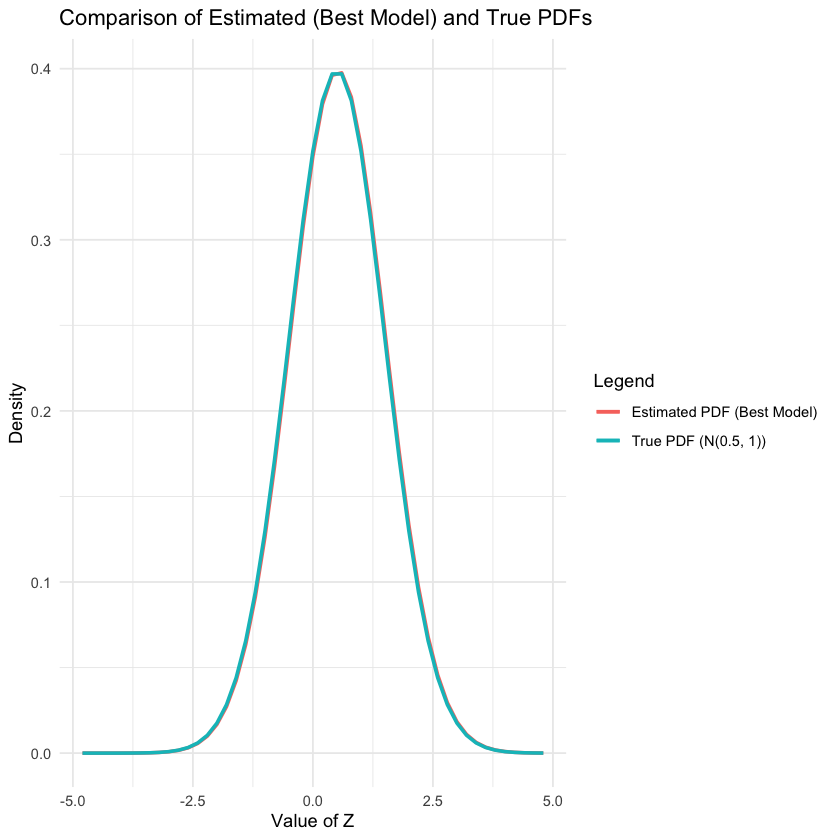

In [16]:
# YOUR CODE (~1 line):
# based on the above AIC values, choose the best model among them
best_degree = which.min(AIC)
model_best =  glm(Y ~ poly(X, best_degree, raw = TRUE) + offset(log(exp(-X^2/2))), family = poisson(link = "log"), data = df)

# YOUR CODE (~6 lines): use ggplot, compute and plot the estimated and true
# pdfs of Z, with the same requirements as before
pdf_est_best = predict(model_best, type = "response") / sum(predict(model_best, type = "response")) / (bin_centers[2] - bin_centers[1])


ggplot(df, aes(x = X)) +
  geom_line(aes(y = pdf_est_best, color = "Estimated PDF (Best Model)"), size = 1) +
  geom_line(aes(y = dnorm(df$X, mean = mu, sd = sigma), color = "True PDF (N(0.5, 1))"), size = 1) +
  labs(title = "Comparison of Estimated (Best Model) and True PDFs",
       y = "Density", x = "Value of Z",
       color = "Legend") +
  theme_minimal()

In [17]:
# install the glmnet package in R; this may take some time
# the glmnet documentation can be found at https://cran.r-project.org/web/packages/glmnet/glmnet.pdf

install.packages("glmnet")
library("glmnet")


The downloaded binary packages are in
	/var/folders/rr/8v9k_gfs7x92pw275qlk3pwc0000gq/T//RtmpUsMVRa/downloaded_packages


6 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept)  2.5938806
1            0.4210377
2           -0.4317125
3            .        
4            .        
5            .        


Warning message:
“Use of `df$X` is discouraged.
ℹ Use `X` instead.”


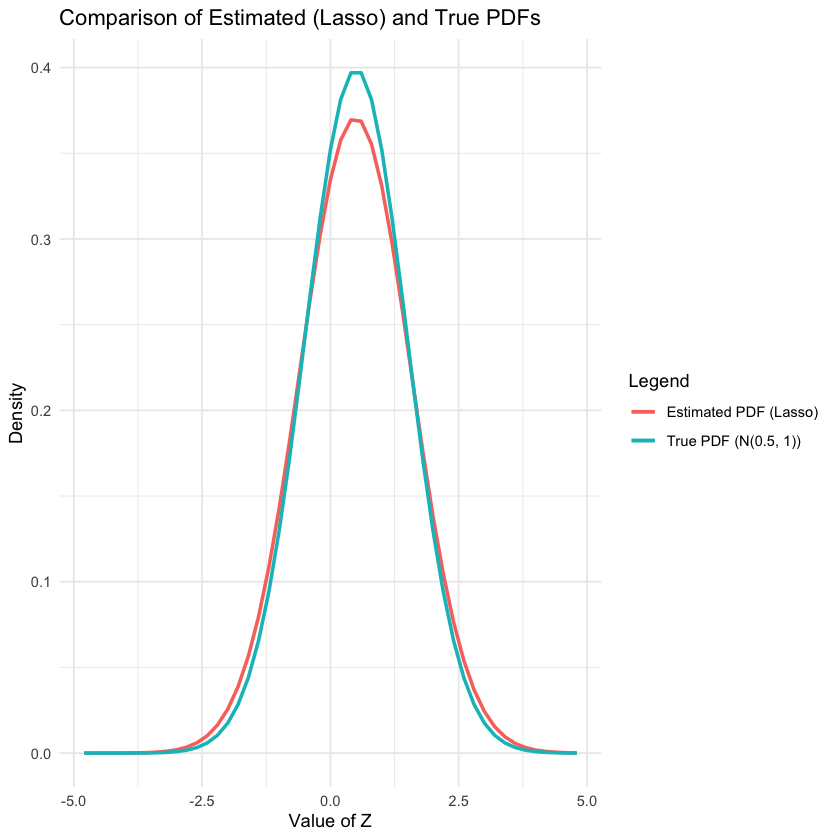

In [19]:
# YOUR CODE (~2 lines):
# fit a Poisson GLM with a degree-5 polynomial of X, using Lasso and 10-fold cross validation
# output the coefficients of the fitted model
# note: look up cv.glmnet in the glmnet documentation
X_matrix = as.matrix(poly(df$X, 5, raw = TRUE))
fit_lasso = cv.glmnet(X_matrix, df$Y, family = "poisson", alpha = 1)
print(coef(fit_lasso, s = fit_lasso$lambda.min))
# YOUR CODE (~6 lines): as before, plot the estimated and true pdfs
predicted_counts_lasso = predict(fit_lasso, newx = X_matrix, s = fit_lasso$lambda.min, type = "response")
pdf_est_lasso = as.vector(predicted_counts_lasso) / sum(predicted_counts_lasso) / (bin_centers[2] - bin_centers[1])

# Plot using ggplot2
ggplot(df, aes(x = X)) +
  geom_line(aes(y = pdf_est_lasso, color = "Estimated PDF (Lasso)"), size = 1) +
  geom_line(aes(y = dnorm(df$X, mean = mu, sd = sigma), color = "True PDF (N(0.5, 1))"), size = 1) +
  labs(title = "Comparison of Estimated (Lasso) and True PDFs",
       y = "Density", x = "Value of Z",
       color = "Legend") +
  theme_minimal()

6 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept)  2.5979261
1            0.4322601
2           -0.4385857
3            .        
4            .        
5            .        


Warning message:
“Use of `df$X` is discouraged.
ℹ Use `X` instead.”


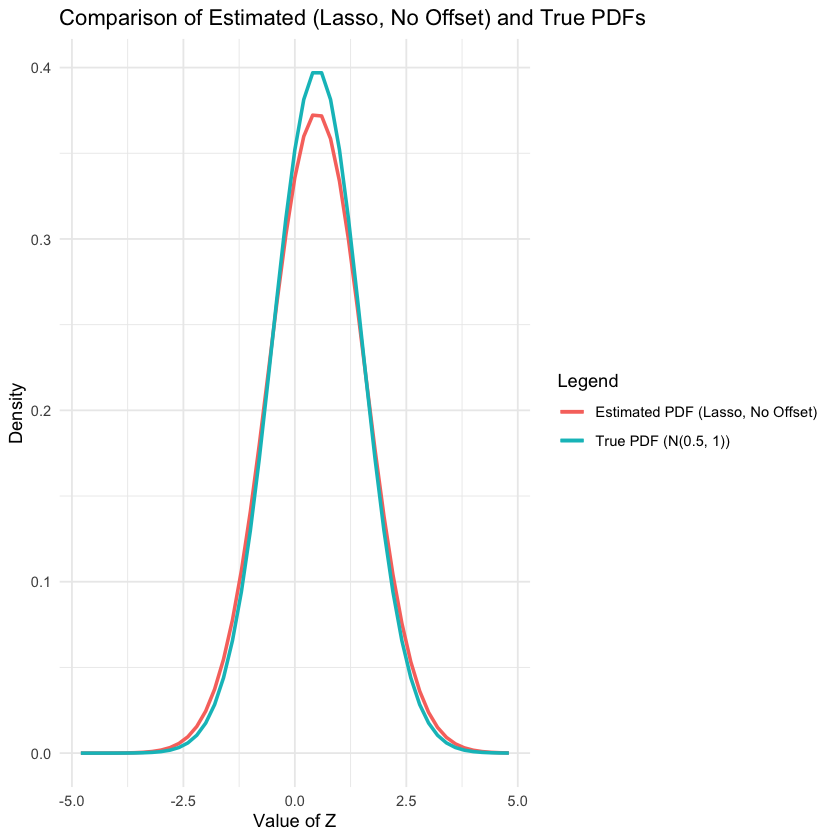

In [20]:
# YOUR CODE (~2 lines):
# fit a Poisson GLM with a degree-5 polynomial of X, using Lasso and 10-fold cross validation
# KEY DIFFERENCE: use no offset in the new Lasso model
# output the coefficients of the fitted model
X_matrix = as.matrix(poly(df$X, 5, raw = TRUE))
fit_lasso_nooffset =cv.glmnet(X_matrix, df$Y, family = "poisson", alpha = 1)
print(coef(fit_lasso_nooffset, s = fit_lasso_nooffset$lambda.min))
# YOUR CODE (~6 lines): as before, plot the estimated and true pdfs
# Compute the estimated PDF from the Lasso model without the offset
predicted_counts_nooffset = predict(fit_lasso_nooffset, newx = X_matrix, s = fit_lasso_nooffset$lambda.min, type = "response")
pdf_est_nooffset = as.vector(predicted_counts_nooffset) / sum(predicted_counts_nooffset) / (bin_centers[2] - bin_centers[1])

# Plot using ggplot2
ggplot(df, aes(x = X)) +
  geom_line(aes(y = pdf_est_nooffset, color = "Estimated PDF (Lasso, No Offset)"), size = 1) +
  geom_line(aes(y = dnorm(df$X, mean = mu, sd = sigma), color = "True PDF (N(0.5, 1))"), size = 1) +
  labs(title = "Comparison of Estimated (Lasso, No Offset) and True PDFs",
       y = "Density", x = "Value of Z",
       color = "Legend") +
  theme_minimal()